# <center><font color=green>Neual Network: MNIST Handwritten Digit Classification</font> </center>

### CNN model built to perform handwritten digit classification

In [106]:
import os  # avoid kernal death
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt

In [107]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

### Loading CNN models

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Loading the dataset

In [109]:
from keras.datasets import mnist

#### The data shape, shuffled, and split between train and test sets

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


#### Displaying some input images and their classification

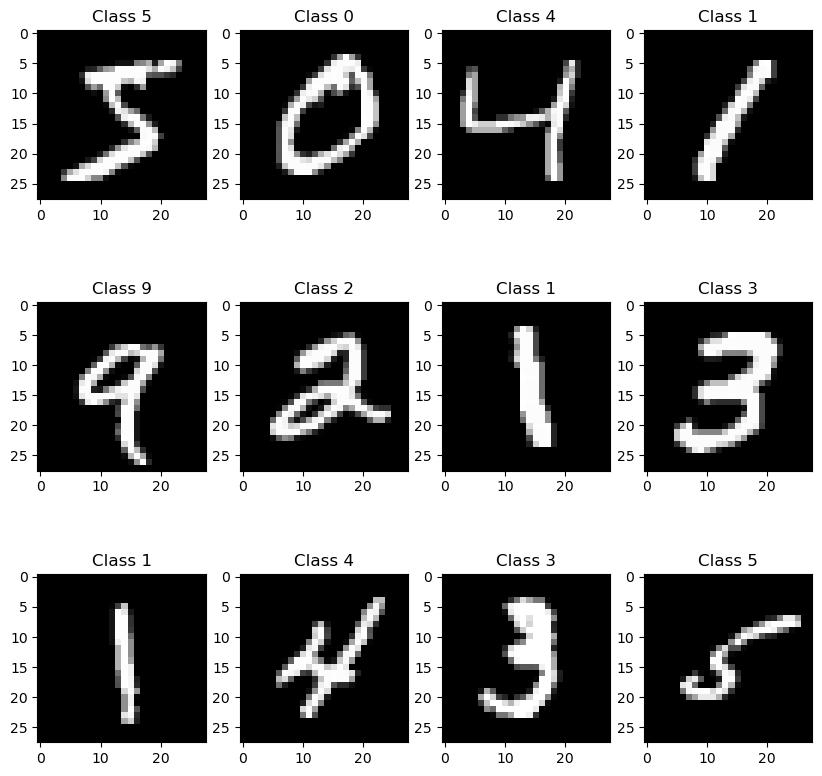

In [111]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]}")

## <font color=blue> Part 1: Building an MLP (Fully-Connected) Model</font>

### Preprocessing the data: 
#### reshape to $(m, n)$, where $m=$ # of samples, $n=$ # of features (pixels)

In [112]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### Normalize the pixels

In [113]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Convert the output labels (y_train and y_test) to categorical data

In [114]:
nb_classes = 10 # number of classification outputs 0..9

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [115]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [116]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [117]:
Y_train.shape

(60000, 10)

In [118]:
y_train.shape

(60000,)

### NN hyperparameters for each layer

In [119]:
n0 = X_train.shape[1]  # Number of pixels in each input image
n1 = 512
n2 = 512
n3 = nb_classes    # 10 classes at the output

### Define the NN model 

In [120]:
model = Sequential()

model.add(Dense(n1, input_dim=n0, activation='relu'))

model.add(Dense(n2, activation='relu'))

model.add(Dense(n3, activation='softmax'))

In [121]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the NN Model

In [122]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [123]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 31s 37ms/step - loss: 0.2181 - accuracy: 0.9352 - val_loss: 0.1180 - val_accuracy: 0.9651
Epoch 2/10
750/750 [==============================] - 29s 38ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.1006 - val_accuracy: 0.9696
Epoch 3/10
750/750 [==============================] - 29s 38ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.0874 - val_accuracy: 0.9749
Epoch 4/10
750/750 [==============================] - 33s 45ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.1206 - val_accuracy: 0.9656
Epoch 5/10
750/750 [==============================] - 27s 36ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0888 - val_accuracy: 0.9756
Epoch 6/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.1096 - val_accuracy: 0.9723
Epoch 7/10
750/750 [==============================] - 31s 42ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0905 - val_accuracy:

In [124]:
# list all data in history

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Compare Loss and Accuracy Performance for train and validation data

In [125]:
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']

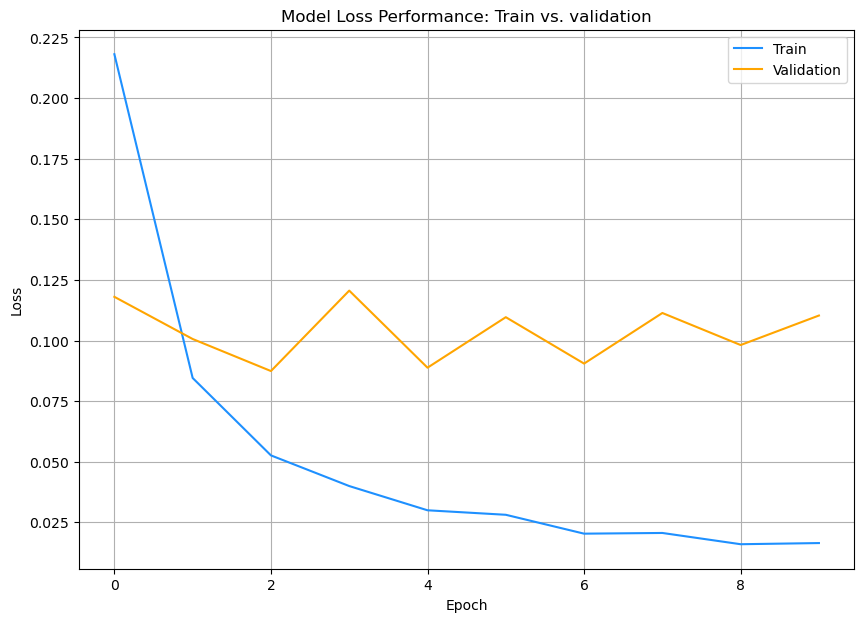

In [126]:
plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

In [127]:
accu = history.history['accuracy']  # Loss data for Training 
accu_val = history.history['val_accuracy']

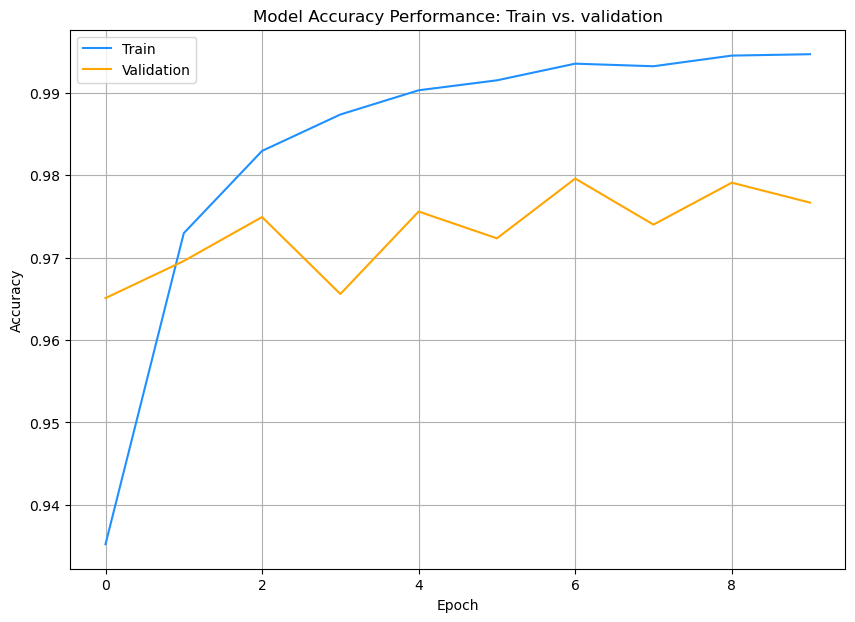

In [128]:
plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

## Test the NN Model

In [129]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 11s 35ms/step - loss: 0.1009 - accuracy: 0.9777


### Predict the digit from the Softmax output. The class with the highest probability will be chosen.

In [130]:
y_pred = model.predict(X_test)
Y_pred_real = np.argmax(Y_pred, axis=1)
Y_test_real = np.argmax(Y_test, axis=1)

313/313 [==============================] - 4s 11ms/step


In [131]:
Y_pred = np.rint(y_pred)

In [132]:
y_pred[0], Y_pred[0]

(array([5.7151053e-17, 2.2702821e-14, 1.9178550e-13, 5.7380504e-07,
        1.0550795e-20, 7.6239212e-16, 5.3121913e-24, 9.9999934e-01,
        4.5889614e-16, 1.3149341e-10], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

### Find the indices in the Y_pred vector with the maximum value

In [135]:
Y_pred_maxidx = np.argmax(Y_pred, axis=1)

In [136]:
Y_test_real[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

## Inspect the outputs 

In [138]:
correct_indices = np.nonzero(Y_pred_maxidx == y_test)[0]  # need [0] to get the first of two arrays with indices
incorrect_indices = np.nonzero(Y_pred_maxidx != y_test)[0]

correct_indices = np.nonzero(Y_pred_real == Y_test_real)[0]  # need [0] to grab the first of two arrays with indices
incorrect_indices = np.nonzero(Y_pred_real != Y_test_real)[0]

### Those are the indices for wrong classification

In [139]:
incorrect_indices

array([   8,  124,  149,  247,  340,  445,  495,  582,  645,  646,  659,
        691,  720,  740,  844,  895,  900,  947,  951, 1014, 1039, 1044,
       1112, 1156, 1224, 1226, 1232, 1242, 1247, 1299, 1319, 1393, 1395,
       1464, 1494, 1500, 1522, 1530, 1549, 1553, 1670, 1681, 1790, 1868,
       1878, 1901, 1930, 1941, 1955, 2004, 2016, 2024, 2043, 2047, 2070,
       2073, 2098, 2109, 2118, 2125, 2129, 2182, 2232, 2272, 2293, 2333,
       2387, 2406, 2422, 2488, 2597, 2607, 2648, 2654, 2810, 2863, 2866,
       2877, 2896, 2927, 2939, 2953, 2970, 3073, 3117, 3289, 3333, 3422,
       3441, 3451, 3475, 3503, 3520, 3549, 3558, 3597, 3634, 3664, 3767,
       3780, 3808, 3818, 3853, 3869, 3902, 3906, 3941, 3943, 3951, 3985,
       4065, 4075, 4078, 4140, 4163, 4176, 4193, 4199, 4201, 4211, 4248,
       4271, 4306, 4360, 4497, 4536, 4567, 4571, 4639, 4671, 4731, 4740,
       4807, 4814, 4823, 4879, 4880, 4890, 4956, 5138, 5199, 5331, 5457,
       5634, 5642, 5676, 5734, 5887, 5922, 5936, 59

In [140]:
incorrect_indices.shape

(194,)

In [141]:
acc = 100*len(correct_indices)/len(y_pred)
print(f'Test accuracy = {acc}%')

Test accuracy = 98.06%


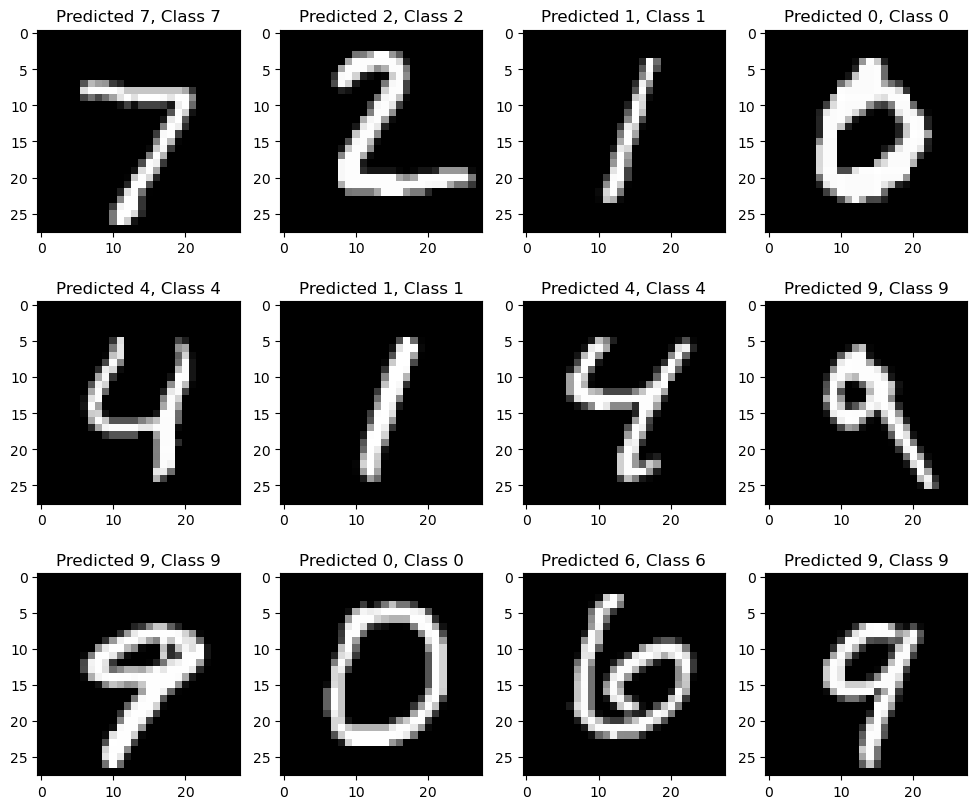

In [142]:
plt.figure(figsize=(12,10))

for i, correct in enumerate(correct_indices[:12]):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(Y_pred_real[correct], Y_test_real[correct]))

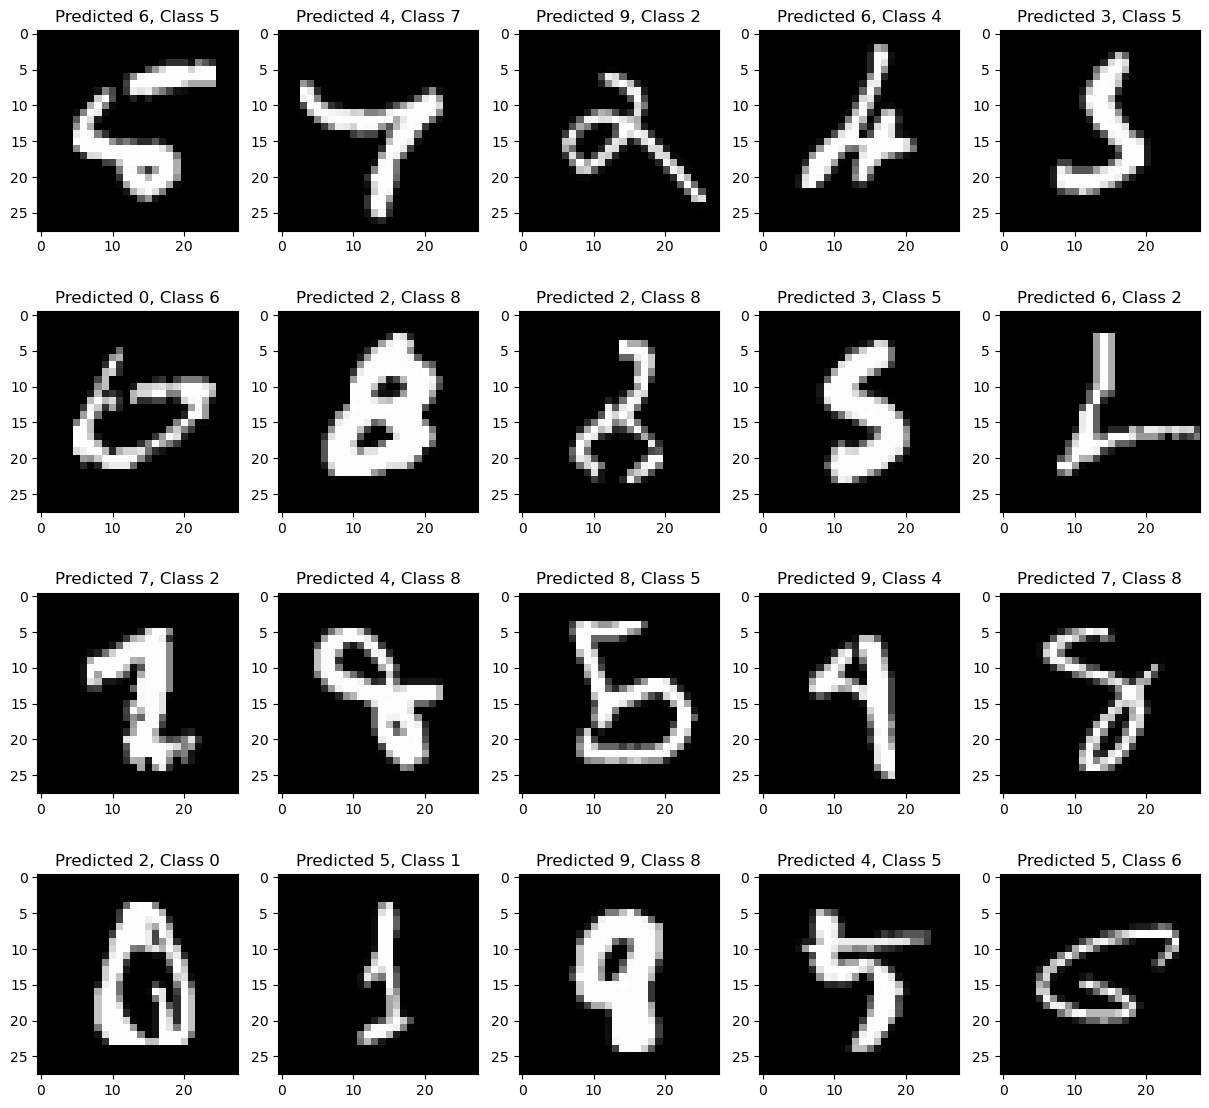

In [143]:
plt.figure(figsize=(15,14))

for i, incorrect in enumerate(incorrect_indices[:20]):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(Y_pred_real[incorrect], Y_test_real[incorrect]))

## <font color=blue> Part 2: Building a Baseline CNN Model</font>

### In this part, we will build a baseline CNN model with one CONV, one POOL and one FC.

In [144]:
from keras.datasets import mnist

In [145]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### Reshape X and Y to ($m$, $n_w$, $n_h$, $n_c$)

### For input images, $n_w=n_h=28$ and $n_c=1$ (grey scale)

In [146]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Shape of X_train =', X_train.shape)
print('Shape of X_test is =', X_test.shape)
print('Shape of y_train is =', y_train.shape)
print('Shape of y_test is =', y_test.shape)

Shape of X_train = (60000, 28, 28, 1)
Shape of X_test is = (10000, 28, 28, 1)
Shape of y_train is = (60000, 1)
Shape of y_test is = (10000, 1)


### Normalize the pixels

In [147]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Convert the output labels to categorical data

In [148]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('Shape of Y_train =', Y_train.shape)
print('Shape of Y_test =', Y_test.shape)

Shape of Y_train = (60000, 10)
Shape of Y_test = (10000, 10)


## Build CNN Model 

In [149]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 100, activation = 'relu'))
model_cnn.add(Dense(units = 10, activation = 'softmax'))

In [150]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_11 (Dense)            (None, 100)               540900    
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

### Train the CNN model

In [151]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


history = model_cnn.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 67s 83ms/step - loss: 0.2050 - accuracy: 0.9408 - val_loss: 0.0806 - val_accuracy: 0.9778
Epoch 2/10
750/750 [==============================] - 64s 86ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0618 - val_accuracy: 0.9821
Epoch 3/10
750/750 [==============================] - 73s 97ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 4/10
750/750 [==============================] - 73s 97ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 5/10
750/750 [==============================] - 67s 89ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0500 - val_accuracy: 0.9853
Epoch 6/10
750/750 [==============================] - 62s 82ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0614 - val_accuracy: 0.9840
Epoch 7/10
750/750 [==============================] - 69s 92ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0558 - val_accuracy:

### Compare Loss and Accuracy Performance for train and validation data

In [152]:
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']

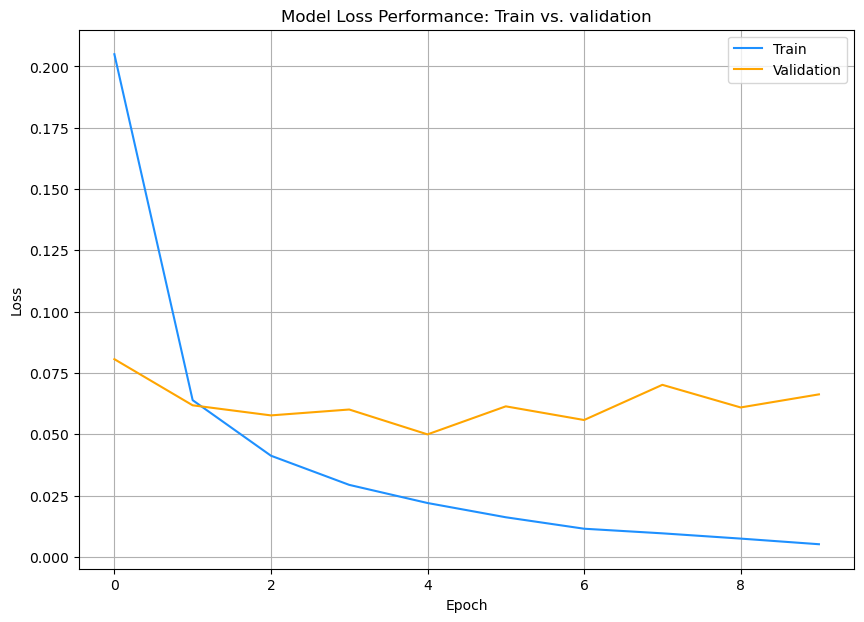

In [153]:
plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

In [154]:
accu = history.history['accuracy']  # Loss data for Training 
accu_val = history.history['val_accuracy']

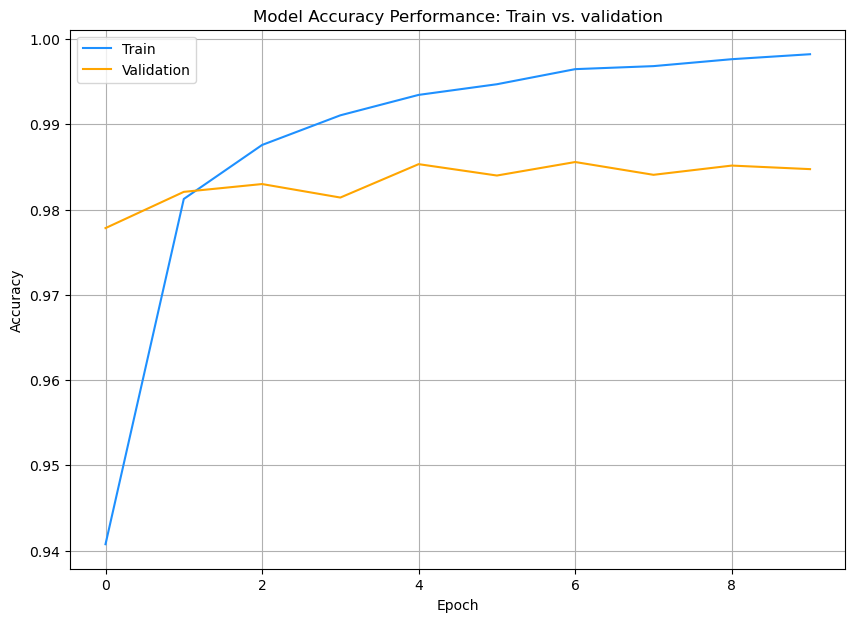

In [155]:
plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

## Test the CNN model 

In [156]:
score = model_cnn.evaluate(X_test, Y_test, verbose=1)

Y_pred = model_cnn.predict(X_test)

313/313 [==============================] - 35s 106ms/step


### Predict the digit from the Softmax output. The class with the highest probability will be chosen.

In [157]:
Y_pred = np.rint(y_pred)

In [158]:
y_pred[0], Y_pred[0]

(array([5.7151053e-17, 2.2702821e-14, 1.9178550e-13, 5.7380504e-07,
        1.0550795e-20, 7.6239212e-16, 5.3121913e-24, 9.9999934e-01,
        4.5889614e-16, 1.3149341e-10], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

### Find the indices in the Y_pred vector with the maximum value

In [159]:
Y_pred_maxidx = np.argmax(Y_pred, axis = 1)

In [160]:
Y_pred_maxidx[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

## Save the Model Parameters

In [161]:
model_cnn.save('MNIST_baseline_model.h5')

## Make Prediction on an input image 

In [246]:
# load the model

model_base = load_model('MNIST_baseline_model.h5')

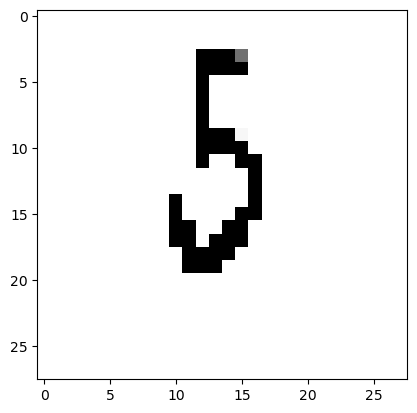

In [262]:
img = load_img('number5.png', target_size=(28, 28,1))

plt.imshow(img, cmap='gray')
plt.show()

In [263]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

In [264]:
img = load_image('number5.png')

In [265]:
# predict the class
pred = model_base.predict(img)
digit = np.argmax(pred)
print(digit, pred)

1/1 [==============================] - 1s 704ms/step
8 [[1.5636928e-02 2.2163779e-06 8.3400778e-02 5.2049436e-04 3.2253610e-08
  2.2294246e-02 1.1482927e-05 1.5813578e-08 7.1474397e-01 1.6338986e-01]]


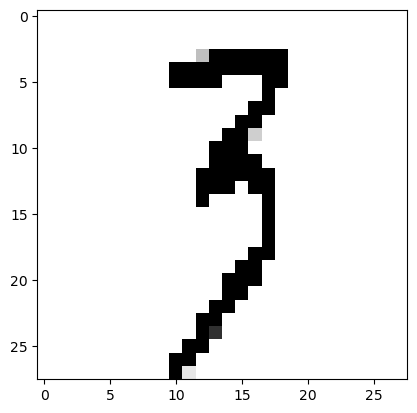

1/1 [==============================] - 0s 208ms/step
5 [[2.11620075e-03 1.75249079e-04 9.89636686e-03 1.16095036e-01
  2.79836386e-01 3.42244059e-01 5.17869554e-02 7.37816617e-02
  1.11537091e-01 1.25310309e-02]]


In [266]:
img = load_img('num3.png', target_size=(28, 28,3))


plt.imshow(img)
plt.show()

# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

img = load_image('num3.png')

# predict the class
pred = model_base.predict(img)
digit = np.argmax(pred)
print(digit, pred)

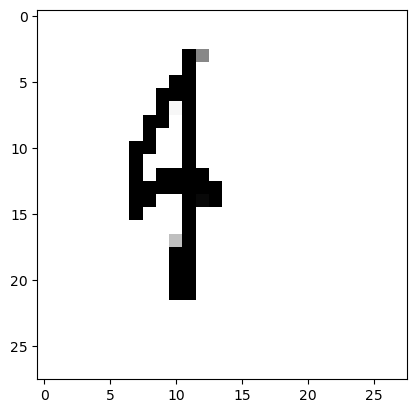

1/1 [==============================] - 0s 224ms/step
8 [[7.2247327e-05 4.0192617e-08 3.9188143e-07 5.3056357e-07 9.2512602e-07
  1.8187171e-08 2.4481316e-04 2.7175685e-07 9.9968004e-01 7.0307425e-07]]


In [267]:
img = load_img('num4.png', target_size=(28, 28,3))


plt.imshow(img)
plt.show()

# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

img = load_image('num4.png')

# predict the class
pred = model_base.predict(img)
digit = np.argmax(pred)
print(digit, pred)

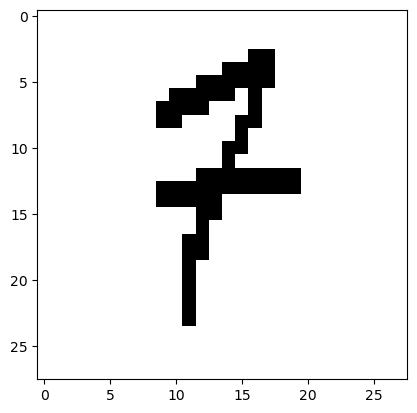

1/1 [==============================] - 0s 318ms/step
8 [[1.3488289e-05 3.9149448e-10 1.1862374e-02 7.5941777e-04 1.5637663e-07
  8.4455661e-07 1.1686579e-08 1.7368084e-05 9.8717695e-01 1.6941800e-04]]


In [268]:
img = load_img('num7.png', target_size=(28, 28,3))


plt.imshow(img)
plt.show()

# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

img = load_image('num7.png')

# predict the class
pred = model_base.predict(img)
digit = np.argmax(pred)
print(digit, pred)